<a href="https://colab.research.google.com/github/rajkumarpec/Unsupervised-Machine-Learning/blob/main/Netflix_movie_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV Shows Clustering


##### **Project Type**    - Unsupervised learning
##### **Contribution**    - Individual
##### **Member 1 - Dr. Raj Kumar**


# **Project Summary -**

# **GitHub Link -** https://github.com/rajkumarpec/Unsupervised-Machine-Learning

# **Problem Statement**

<b>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/4-Unsupervised Machine learning/5-Netflix movies and Tv shows clustering (Clustering)/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')



### Dataset First View

In [4]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

print('Number of rows {} \n Number of columns {}'.format(df.shape[0],df.shape[1]))

Number of rows 7787 
 Number of columns 12


### Dataset Information

In [6]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count

df.isna().sum().sort_values(ascending= False).reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,director,2389
1,cast,718
2,country,507
3,date_added,10
4,rating,7
5,show_id,0
6,type,0
7,title,0
8,release_year,0
9,duration,0


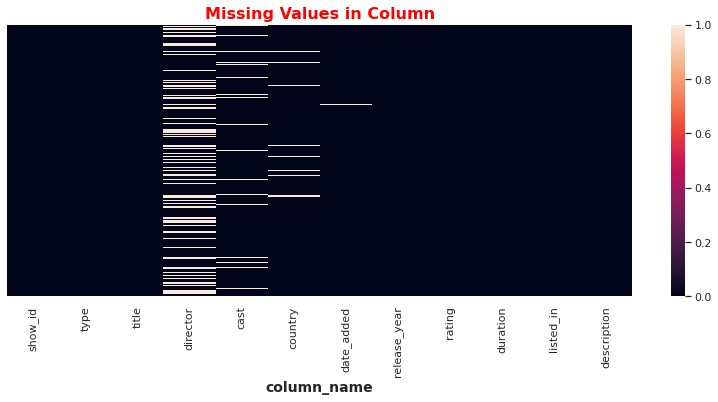

In [9]:
# Visualizing the missing values

plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=16,color='red')
plt.show()



### What did you know about your dataset?

* The dataset contains information about specific movies.
* There are NaN values present in the director, cast, country, date_added, and rating columns.
* It is not possible to impute missing values using any method, as the data is specific to each movie.
* To avoid losing any data, the decision has been made to impute NaN values with empty space.
* This approach may not always be the best option, as external sources could potentially provide missing information for some of the columns. 

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ***3. Variables Description***

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


* After analyzing the dataset, it has been decided to focus on specific columns for modeling purposes.
* The columns of interest are 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description'.
* These columns are believed to carry a lot of information that will be useful for modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis (EDA) is a crucial initial step before making any modifications to a dataset or creating a statistical model to address business problems. The EDA process involves summarizing, visualizing, and gaining a deep understanding of the significant characteristics of a dataset. In essence, EDA is aimed at exploring and discovering insights from the data to inform subsequent data processing, modeling, and decision-making activities.

### **4.1. Type Column:**

In [15]:
# Number of Movies and TV Shows in the dataset
print(df.type.value_counts())
print(" ")

Movie      5377
TV Show    2410
Name: type, dtype: int64
 


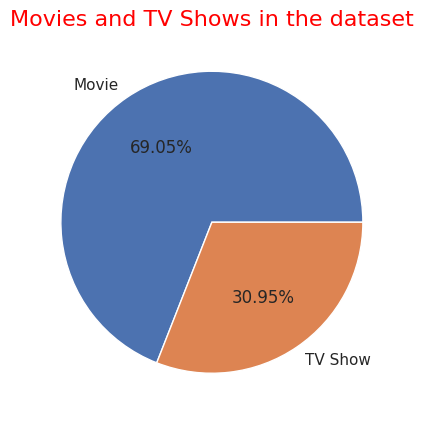

In [17]:
# visualization of Movies and TV Shows in the dataset
plt.figure(figsize=(10,5),dpi=100)
df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset',fontsize=16,color='red');

* The dataset contains more movies than TV shows. Specifically, 69.05% of the data pertains to movies, while 30.95% pertains to TV shows.

### **4.2 Title column:**

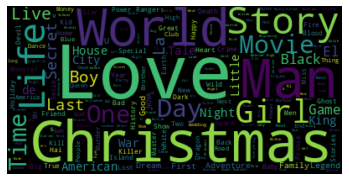

In [18]:
# Creating and Displaying a Word Cloud Based on Titles in a Pandas Dataframe
text = " ".join(word for word in df['title'])

# Create the WordCloud object and generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# Display the word cloud using matplotlib.pyplot
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

* The words like Christmas, Love, World, Man and  Story are very comman word which are appear most in movie title column.  

### **4.3 Director column:**

In [20]:
# Printing the Number of Directors for Movies and TV Shows Separately

print(f"number of director who  by directed movie : { df[df['type']=='Movie']['director'].value_counts().sum()}")
print(f"number of director who  by directed TV Show : { df[df['type']=='TV Show']['director'].value_counts().sum()}")

number of director who  by directed movie : 5214
number of director who  by directed TV Show : 184


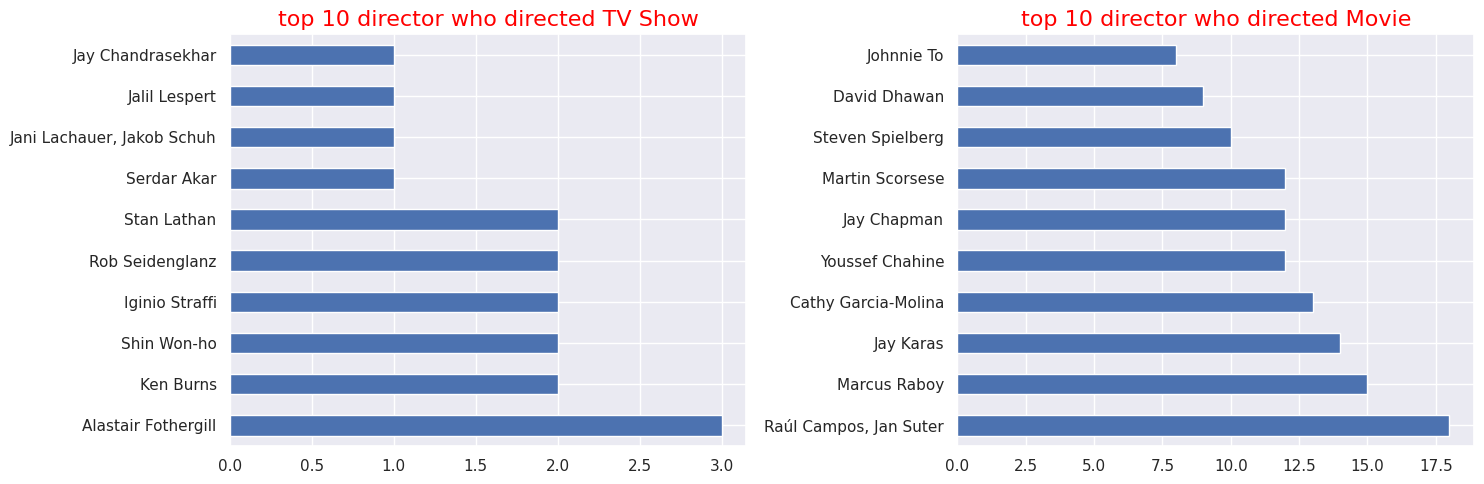

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 director who directed TV show
show = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=16,color='red')

# top 10 director who directed movie
movie = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=16,color='red')

plt.tight_layout()
plt.show()

* The director Alastair Fothergill has directed three TV shows, which is the highest number of TV shows directed by any director in the dataset.
* Raul Campos and Jan Suter have collaborated directed 18 movies, which is the highest number compared to any other director pair in the dataset. Following them are Marcus Raboy, Jay Karas, and Cathy Garcia-Molina.


### **4.4 Cast column:**

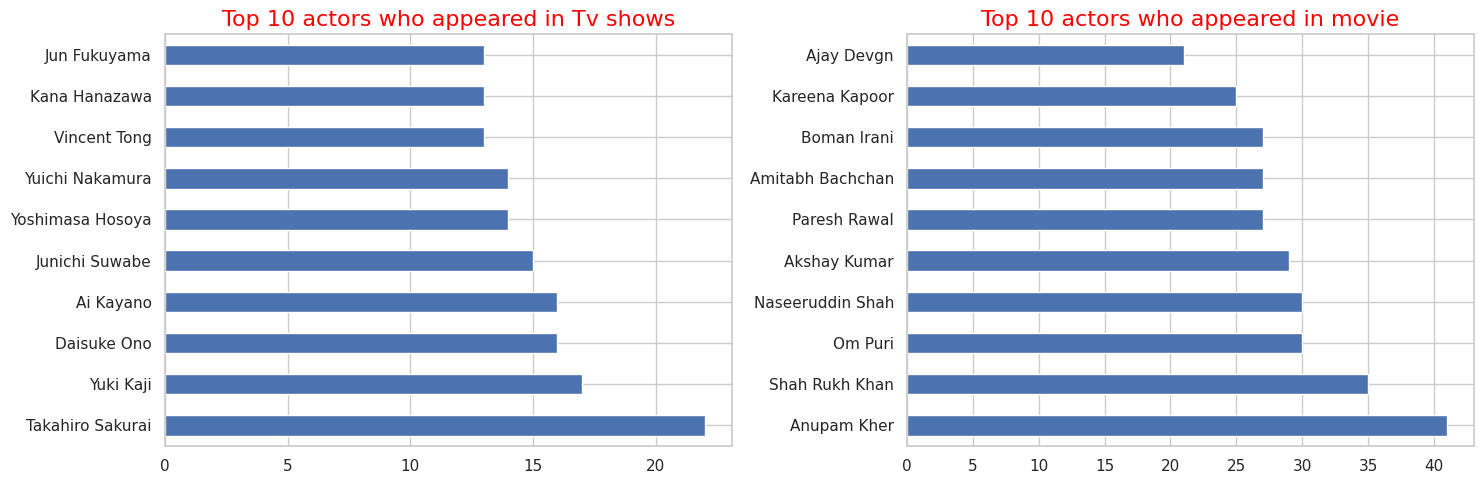

In [22]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# top 10 TV shows actor 
TV_shows = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=16,color='red')

# top 10 Movie actor 
movies = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=16,color='red')

plt.tight_layout()
plt.show()

* Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.
* Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies / TV shows')

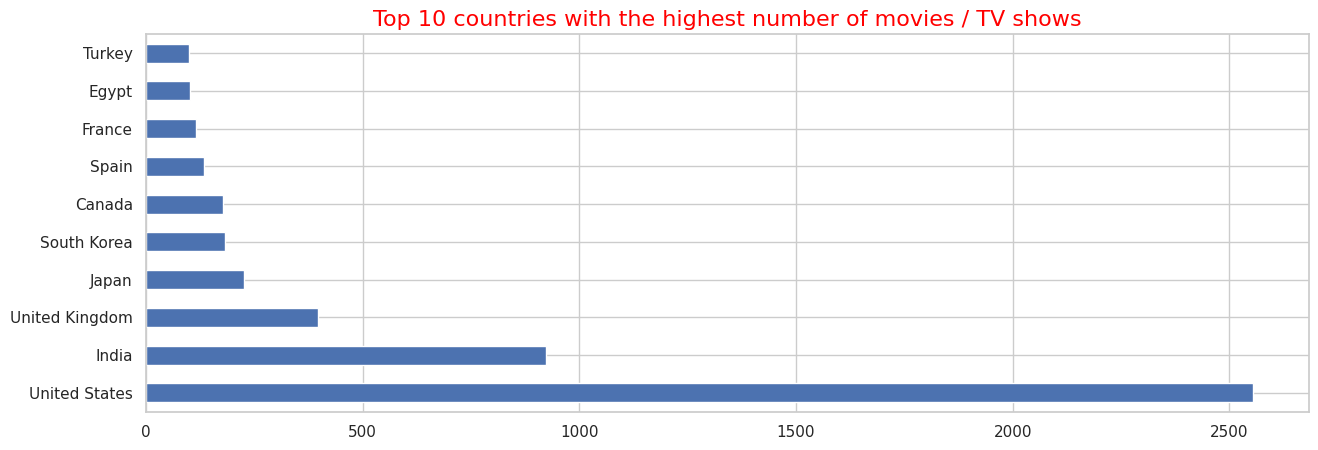

In [23]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(15,5),dpi=100)
df.country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of movies / TV shows',fontsize=16,color='red')

* The highest number of movies / TV shows were based out of the US, followed by India and UK.

### **4.6 Release_Year column:**

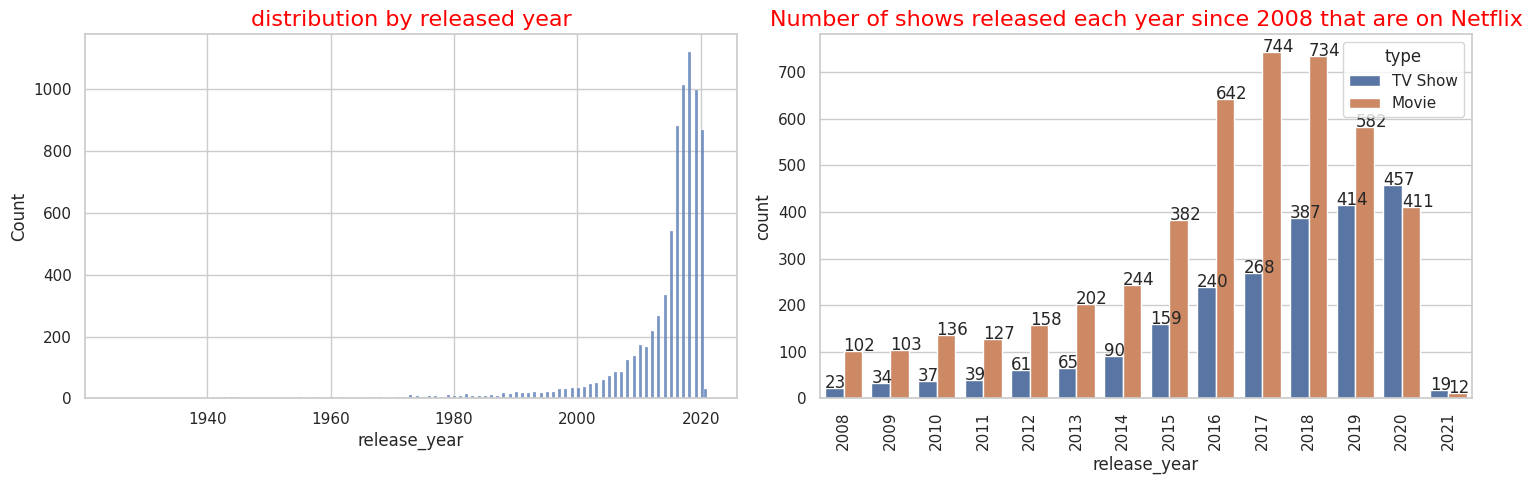

In [24]:
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('distribution by released year',fontsize=16,color='red')

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=range(2008,2022), ax=ax[1])
count.set_title('Number of shows released each year since 2008 that are on Netflix',fontsize=16,color='red')
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

* Netflix has more new movies and TV shows than old ones.
* The company has a consistent focus on adding new shows to its platform.
* In 2020, there was a decrease in the number of movies added, but not in the number of TV shows added. This could indicate a shift towards introducing more TV series rather than movies on Netflix.

### **4.7 Rating column:**

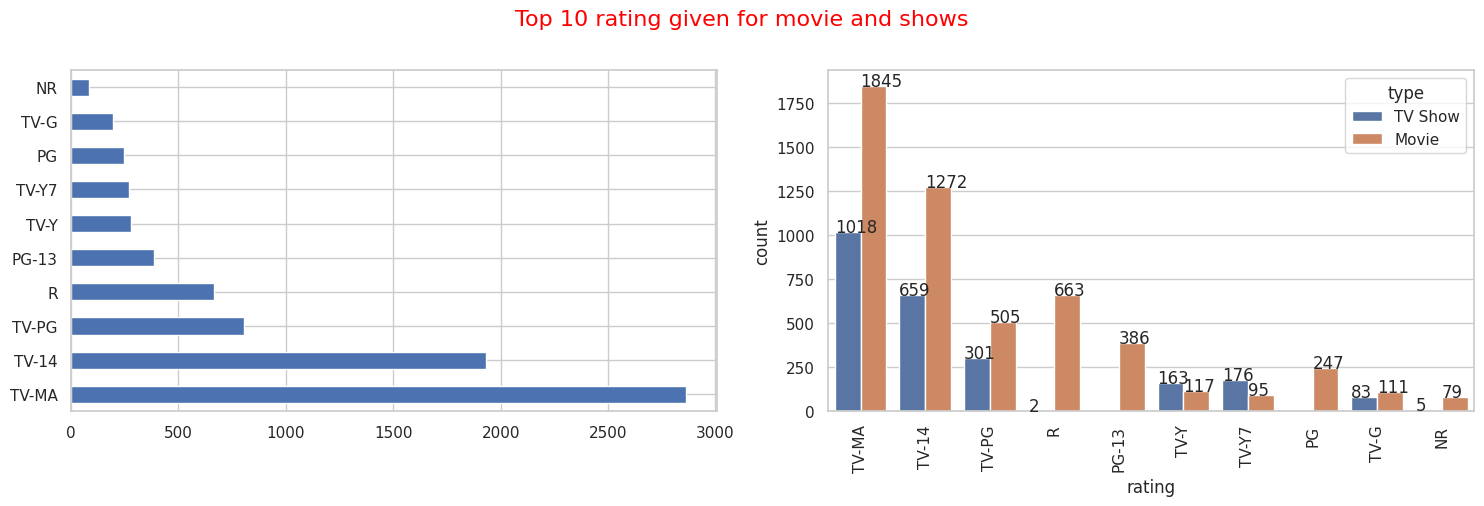

In [25]:
# Top 10 Rating 
fig,ax = plt.subplots(1,2, figsize=(15,5),dpi=100)
plt.suptitle('Top 10 rating given for movie and shows', size=16,color='red', y=1.01)

# univariate analysis
df['rating'].value_counts()[:10].plot(kind='barh',ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

* Most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).



### **4.8 Duration column:**

In [26]:
# duration column
df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [27]:
# Creating different dataset from duration

netflix_shows=df[df['type']=='TV Show']
netflix_movies=df[df['type']=='Movie']

#### **4.8.1 Netflix Movie Duration**

Text(0.5, 0, 'Year')

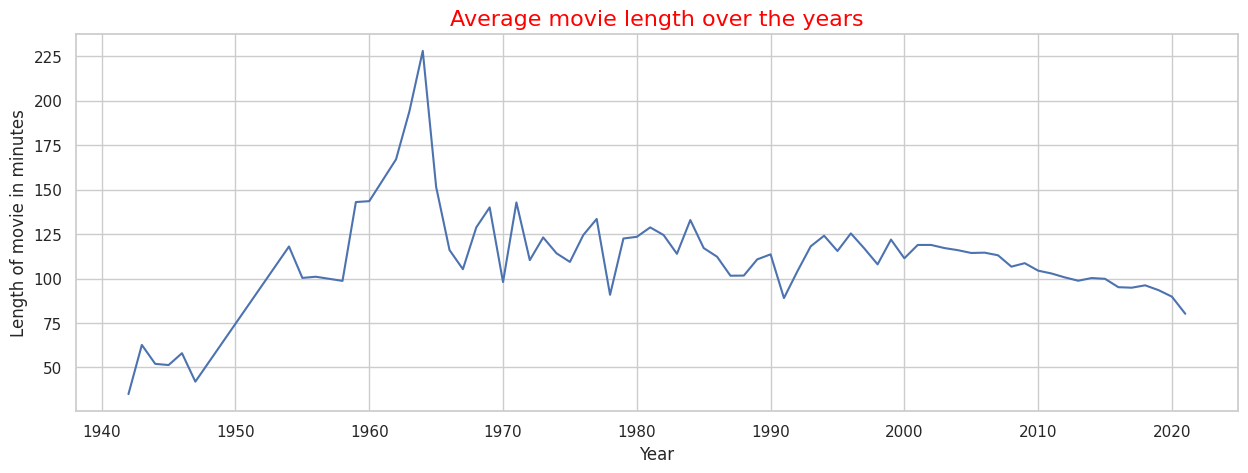

In [28]:
# movie duration 
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

# Average movie length over the years
plt.figure(figsize=(15,5),dpi=100)
netflix_movies.groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years',fontsize=16,color='red')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

* Netflix offers a range of movies on its platform, including those from as far back as 1942.
* Movies made in the 1940s had a relatively short duration, according to their plots.
* On average, movies made in the 1960s are the longest in length.
* The average length of movies has been decreasing steadily since the 2000s.

#### **4.8.2 Netflix TV show Duration**

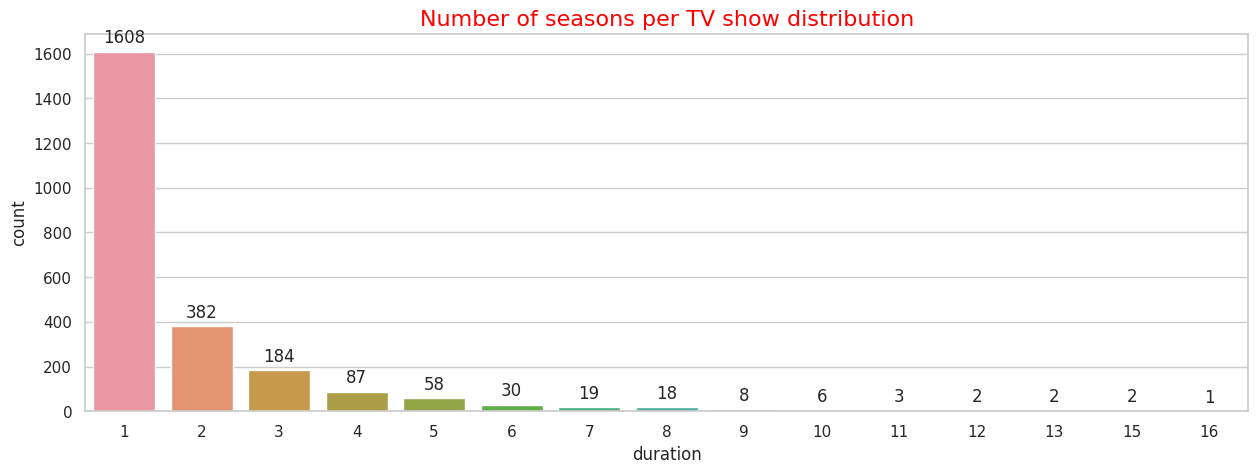

In [29]:
# TV show duration 
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Seasons','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)

# Seasons in each TV show
plt.figure(figsize=(15,5),dpi=100)
p = sns.countplot(x='duration',data=netflix_shows)
plt.title('Number of seasons per TV show distribution',fontsize=16,color='red')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

* The TV series in the dataset have a maximum of 16 seasons, but the majority only have one season.
* This could suggest that many of the TV shows are relatively new and additional seasons may be in the works.
* There are very few TV shows in the dataset with more than 8 seasons.

Text(0.5, 1.0, 'Top 10 genres')

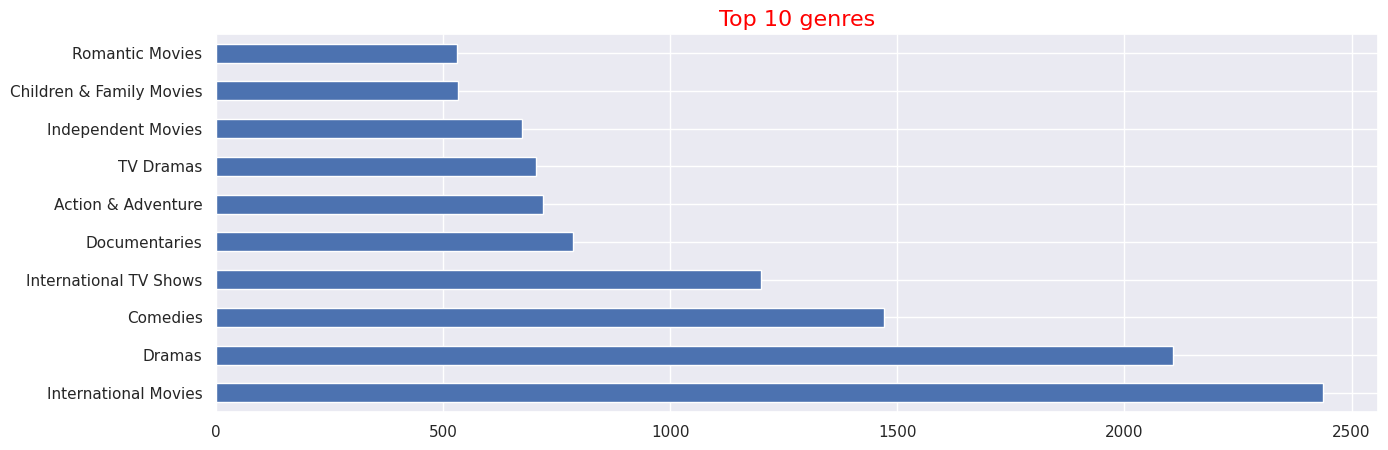

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
plt.figure(figsize=(15,5),dpi=100)
genres = genres.value_counts()[:10].plot(kind='barh')
plt.title('Top 10 genres',fontsize=16,color='red')

* The International movie is the most popular genre followed by dramas and comedies.

### **4.10 Description**

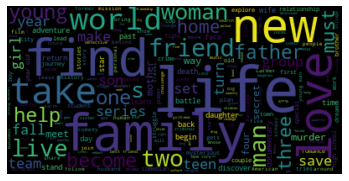

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

* Most of the comman words present in description column are family, find, life, love, new, world, friend.


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

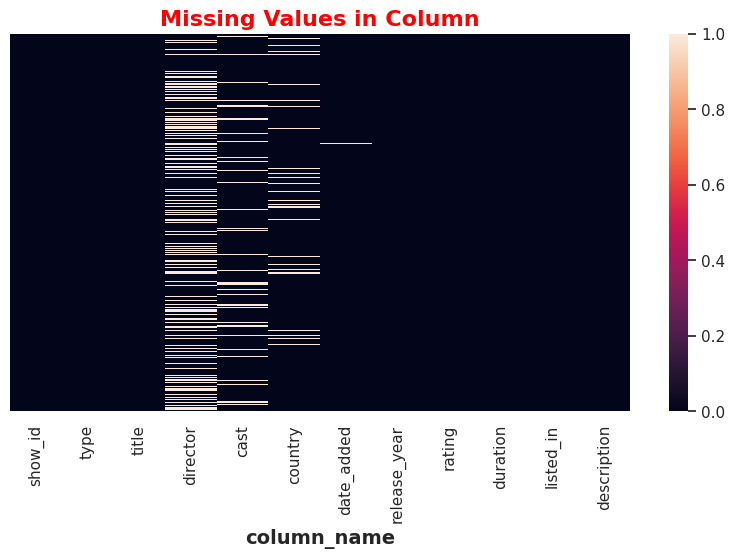

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing Values in Column",fontweight="bold",size=16,color='red')
plt.show()

In [ ]:
# Missing Data %
round(df.isna().mean().sort_values(ascending=False)*100,2)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

* For the missing values in the director, cast, and country attributes, the 'empty string' can be used as a replacement.
* The percentage of null values in the rating and date_added columns is small, and dropping these values may not significantly impact model building.

In [30]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [31]:
# checking for null values after treating them.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all the missing values in the dataset.

### 2. Handling Outliers

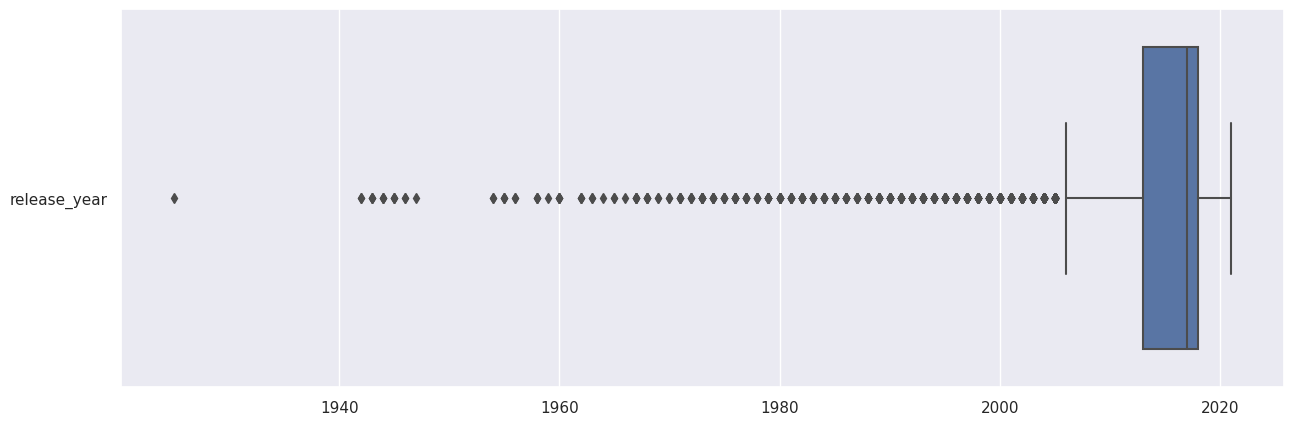

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,5),dpi=100)
sns.boxplot(data=df,orient='h');

* Outlier handling may not be necessary for textual data as outliers are typically defined in numerical data.
* Data cleaning and preprocessing steps are still necessary to ensure the data is ready for model building.

## ***6. Textual Data Preprocessing***
**Modeling Approach**
Here are the steps for the modeling approach:

1. Select the attributes that will be used to cluster the shows.
2. Perform text preprocessing by removing stopwords and punctuation marks, and converting all textual data to lowercase.
3. Use stemming to generate a meaningful word out of the corpus of words.
4. Tokenize the corpus and perform word vectorization.
5. Apply dimensionality reduction techniques to reduce the dimensionality of the dataset.
6. Use different algorithms to cluster the movies and determine the optimal number of clusters using various techniques such as the elbow method or silhouette score.
7. Build the optimal number of clusters and visualize the contents of each cluster using word clouds to gain insights about the characteristics of each cluster.

### **6.1. Clustering Attributes**

We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [33]:
# Copying the original dataset for clustering as it does not contain any missing values to handle
df1 = df.copy()

In [34]:
# creating clustering_attributes column using all text column which one is used for model building purpose.
df1['clustering_attributes'] = df1['description'] + df1['listed_in'] + df1['rating'] + df1['cast'] + df1['country'] + df1['director']

In [35]:
df1.clustering_attributes[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

* All the required data has been successfully consolidated into a single column.

### **6.2. Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoao Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zeze Motta, Celso FrateschiBrazil '

### **6.3. Removing stopwords and lower case:**

In [36]:
# Download the stop words list if it hasn't been downloaded already
nltk.download('stopwords')

# Create a set of English stop words
stop_words = stopwords.words('english')

# Display the stop words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Text Preprocessing: Removing Stopwords and Punctuation Marks, and Stemming.
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
df1['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoao miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zeze motta, celso frateschibrazil'

* The corpus has been successfully converted to lowercase and all the stopwords have been removed.

### **6.4. Removing Punctuation:**

Removing punctuation is a common preprocessing step in natural language processing (NLP) tasks. Punctuation marks such as periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can impact the performance of NLP models.

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df1['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazil'

* All the punctuation marks have been successfully dropped from the corpus.

### **6.5 Stemming:**

* Stemming operation bundles together words with the same root. For example, the stem operation bundles "response" and "respond" into the common stem "respon".

* The **SnowballStemmer** has been used to generate a meaningful word out of the corpus of words.

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#performing stemming operation
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stemming)

In [ ]:
df1['clustering_attributes'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazil'

### **6.6 Text Vectorization**.

Text Vectorization is the process of converting text into numerical representation

- We will  vectorized the corpus using **TFIDF vectorizer**, where TFIDF stands for **Term Frequency Inverse Document Frequency**.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [ ]:
# # extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)  # max features = 10000 to prevent system from crashing
tfid_matrix = tfid_vectorizer.fit_transform(df1['clustering_attributes'])

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()  

In [ ]:
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


#### 5. **Dimensionality Reduction:**

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible.

* PCA (Principal Component Analysis) can be used to reduce the dimensionality of the data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

PCA(random_state=0)

Text(0, 0.5, 'cumulative explained variance')

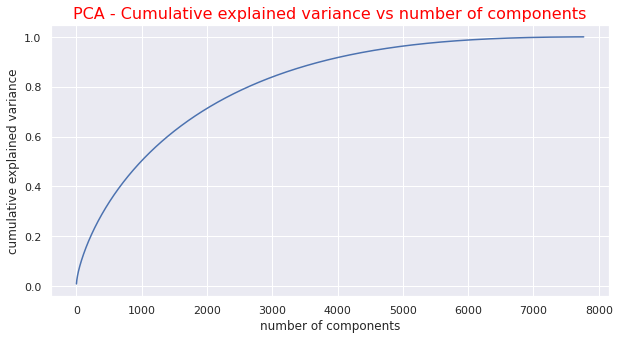

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components',fontsize=16,color='red')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* After performing PCA, it was found that ~7600 components can explain 100% of the variance in the data.
* More than 80% of the variance can be explained by just 4000 components.
* Selecting the top 4000 components can help simplify the model and reduce dimensionality while still capturing more than 80% of the variance.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

PCA(n_components=4000, random_state=0)

In [ ]:
# transformed features
X = pca.transform(array)

# shape of transformed vectors
X.shape

(7770, 4000)

* The dimensionality of the data has been successfully reduced using PCA.

## **7. Clusters implementation**

### **7.1. K-Means Clustering**

* K-means clustering is a popular unsupervised machine learning algorithm that divides a dataset into a predefined number of clusters. Since it is an unsupervised algorithm, it does not rely on labeled examples to learn about the data. To determine the optimal number of clusters for the K-means algorithm, we can use the elbow curve and Silhouette score visualization techniques.

Text(0, 0.5, 'Sum of squared errors')

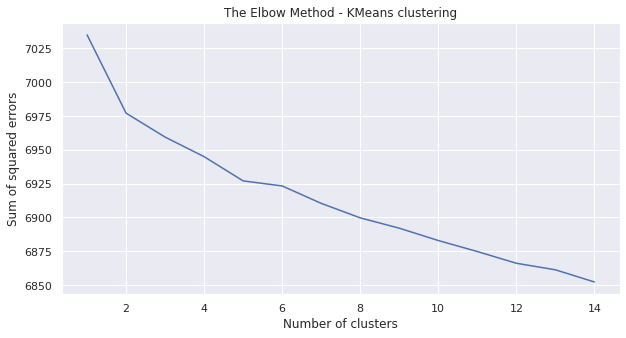

In [ ]:
# Elbow method to find the optimal value of k
SSE=[]
for i in range(1,15):
  # Initialize the k-means model with the current value of i
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the value of SSE
number_clusters = range(1,15)
plt.figure(figsize=(15,5),dpi=100)
plt.plot(number_clusters,SSE)
plt.title('The Elbow Method - KMeans clustering',fontsize=16,color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')

* The elbow curve is a plot of the sum of squared distances between each point and the centroid in a cluster against the number of clusters. As the number of clusters increases, the sum of squared distances generally decreases. The "elbow" point on the curve represents the optimal number of clusters, beyond which the decrease in sum of squared distances is not significant.

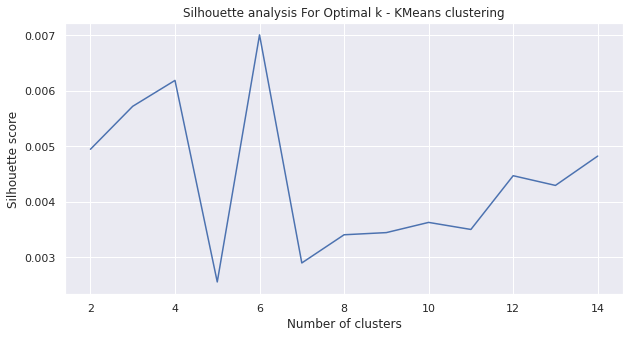

In [ ]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(15,5),dpi=100)
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering',fontsize=16,color='red')
plt.show()

* **The highest Silhouette score is obtained for 6 clusters.**

Building clusters using the k-means algorithm:

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6923.21631521169, 0.007008324053458728)


In [ ]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

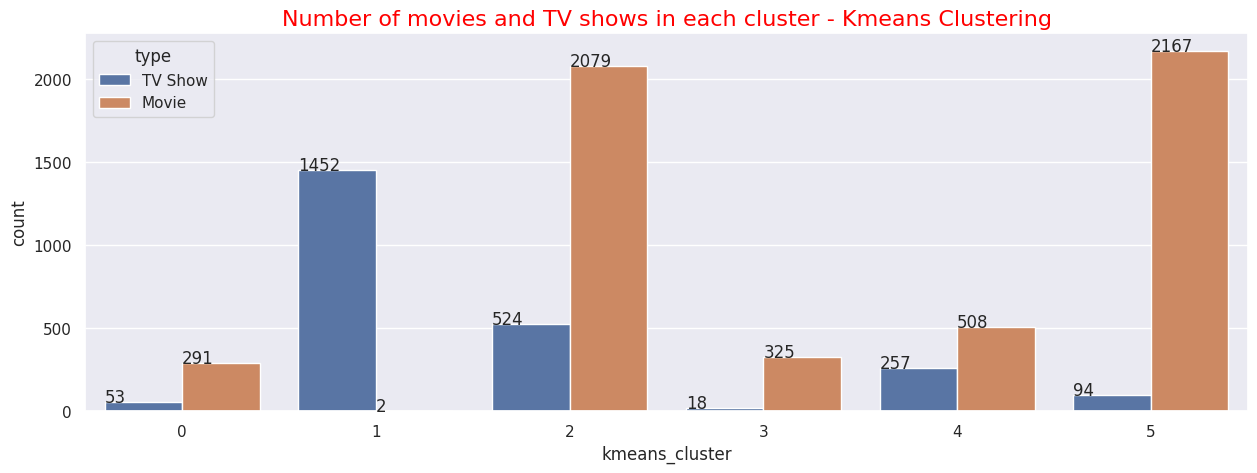

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,5),dpi=100)
graph = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering',fontsize=16,color='red')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

**Successfully built 6 clusters using the k-means clustering algorithm.**